In [1]:
import numpy as np
import pandas as pd

In [2]:
FILE_PATH_ = "Mobility/"

In [3]:
df_Friedberg = pd.read_csv('Mobility/Messstationen Luftqualitaet/FrankfurtFriedbergerLandstr_new/messwerte.txt',na_values='-',  delimiter=';', parse_dates= [['Datum','Zeit']])
df_Ost = pd.read_csv('Mobility/Messstationen Luftqualitaet/FrankfurtOst_new/messwerte.txt', na_values='-', delimiter=';', parse_dates= [['Datum','Zeit']])
df_Ost.fillna(method='ffill', inplace=True)
df_Schwan = pd.read_csv('Mobility/Messstationen Luftqualitaet/FrankfurtSchwanheim/messwerte.txt', na_values='-', delimiter=';', parse_dates= [['Datum','Zeit']])
df_Schwan.fillna(method='ffill', inplace=True)
df_Hochst = pd.read_csv('Mobility/Messstationen Luftqualitaet/FrankfurtHöchst_new/messwerte.txt', na_values='-', delimiter=';', parse_dates= [['Datum','Zeit']])

In [4]:
df_Friedberg.head()

,Datum_Zeit,Stickstoffmonoxid (NO)[µg/m³],Stickstoffdioxid (NO2)[µg/m³]
0,01.07.2018 00:30,8.9,23.2
1,01.07.2018 01:00,15.2,22.2
2,01.07.2018 01:30,14.9,24.3
3,01.07.2018 02:00,10.8,18.5
4,01.07.2018 02:30,10.6,23.9


In [5]:
from dateutil.parser import parse
df_Friedberg.drop(df_Friedberg.loc[df_Friedberg.Datum_Zeit.str.contains('24:00')].index,axis = 0, inplace = True)
df_Friedberg.Datum_Zeit = df_Friedberg.Datum_Zeit.apply(lambda x: parse(x))
df_Hochst.drop(df_Hochst.loc[df_Hochst.Datum_Zeit.str.contains('24:00')].index,axis = 0, inplace = True)
df_Hochst.Datum_Zeit = df_Hochst.Datum_Zeit.apply(lambda x: parse(x))
df_Ost.drop(df_Ost.loc[df_Ost.Datum_Zeit.str.contains('24:00')].index,axis = 0, inplace = True)
df_Ost.Datum_Zeit = df_Ost.Datum_Zeit.apply(lambda x: parse(x))
df_Schwan.drop(df_Schwan.loc[df_Schwan.Datum_Zeit.str.contains('24:00')].index,axis = 0, inplace = True)
df_Schwan.Datum_Zeit = df_Schwan.Datum_Zeit.apply(lambda x: parse(x))

In [6]:
df_Friedberg.head()

,Datum_Zeit,Stickstoffmonoxid (NO)[µg/m³],Stickstoffdioxid (NO2)[µg/m³]
0,2018-01-07 00:30:00,8.9,23.2
1,2018-01-07 01:00:00,15.2,22.2
2,2018-01-07 01:30:00,14.9,24.3
3,2018-01-07 02:00:00,10.8,18.5
4,2018-01-07 02:30:00,10.6,23.9


In [7]:
df_Hochst.head()

,Datum_Zeit,Stickstoffmonoxid (NO)[µg/m³],Stickstoffdioxid (NO2)[µg/m³],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad]
0,2018-01-07 00:30:00,2.5,12.8,19.5,2.1,47.0
1,2018-01-07 01:00:00,0.4,10.2,18.8,1.8,53.0
2,2018-01-07 01:30:00,0.4,10.0,18.5,1.9,43.0
3,2018-01-07 02:00:00,1.1,9.6,18.1,1.9,43.0
4,2018-01-07 02:30:00,0.4,7.8,17.7,1.8,45.0


In [8]:
df_Ost.head()

,Datum_Zeit,Stickstoffmonoxid (NO)[µg/m³],Stickstoffdioxid (NO2)[µg/m³],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad]
0,2018-01-07 00:30:00,0.4,5.1,17.2,2.0,12.0
1,2018-01-07 01:00:00,0.4,4.5,16.9,1.8,21.0
2,2018-01-07 01:30:00,0.4,3.8,16.6,2.3,16.0
3,2018-01-07 02:00:00,0.4,3.2,16.3,2.4,11.0
4,2018-01-07 02:30:00,0.4,3.5,15.7,1.8,6.0


In [9]:
df_Hochst.dtypes

Datum_Zeit                       datetime64[ns]
Stickstoffmonoxid (NO)[µg/m³]           float64
Stickstoffdioxid (NO2)[µg/m³]           float64
Temperatur[°C]                          float64
Windgeschwindigkeit[m/s]                float64
Windrichtung[Grad]                      float64
dtype: object

In [10]:
df_Ost.dtypes

Datum_Zeit                       datetime64[ns]
Stickstoffmonoxid (NO)[µg/m³]           float64
Stickstoffdioxid (NO2)[µg/m³]           float64
Temperatur[°C]                          float64
Windgeschwindigkeit[m/s]                float64
Windrichtung[Grad]                      float64
dtype: object

In [11]:
import matplotlib.pyplot as plt
print(df_Ost.max())
df_Ost.groupby(df_Ost.Datum_Zeit.dt.date)['Stickstoffmonoxid (NO)[µg/m³]'].mean().plot(figsize = (5,5))
plt.show()

Datum_Zeit                       2018-12-09 23:30:00
Stickstoffmonoxid (NO)[µg/m³]                  124.3
Stickstoffdioxid (NO2)[µg/m³]                  122.1
Temperatur[°C]                                  36.7
Windgeschwindigkeit[m/s]                         5.9
Windrichtung[Grad]                               360
dtype: object


<Figure size 500x500 with 1 Axes>

In [12]:
df_Ost.groupby(df_Ost.Datum_Zeit.dt.date).mean().corr()

,Stickstoffmonoxid (NO)[µg/m³],Stickstoffdioxid (NO2)[µg/m³],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad]
Stickstoffmonoxid (NO)[µg/m³],1.000000,0.694633,-0.326574,-0.273811,-0.137252
Stickstoffdioxid (NO2)[µg/m³],0.694633,1.000000,-0.011280,-0.570226,-0.173045
Temperatur[°C],-0.326574,-0.011280,1.000000,-0.063659,-0.222993
Windgeschwindigkeit[m/s],-0.273811,-0.570226,-0.063659,1.000000,0.187128
Windrichtung[Grad],-0.137252,-0.173045,-0.222993,0.187128,1.000000


In [13]:
df_Hochst.groupby(df_Hochst.Datum_Zeit.dt.date).mean().corr()

,Stickstoffmonoxid (NO)[µg/m³],Stickstoffdioxid (NO2)[µg/m³],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad]
Stickstoffmonoxid (NO)[µg/m³],1.000000,0.706160,-0.487900,-0.240849,0.219398
Stickstoffdioxid (NO2)[µg/m³],0.706160,1.000000,-0.007340,-0.593694,0.238976
Temperatur[°C],-0.487900,-0.007340,1.000000,-0.131732,-0.188799
Windgeschwindigkeit[m/s],-0.240849,-0.593694,-0.131732,1.000000,0.161832
Windrichtung[Grad],0.219398,0.238976,-0.188799,0.161832,1.000000


In [14]:
df_Friedberg.groupby(df_Friedberg.Datum_Zeit.dt.date).mean().corr()

,Stickstoffmonoxid (NO)[µg/m³],Stickstoffdioxid (NO2)[µg/m³]
Stickstoffmonoxid (NO)[µg/m³],1.000000,0.702227
Stickstoffdioxid (NO2)[µg/m³],0.702227,1.000000


# Introducing weather data

In [15]:
x_O = df_Ost.groupby(df_Ost.Datum_Zeit.dt.date)['Windrichtung[Grad]'].mean().map(lambda x: (np.cos(x), np.sin(x)))
x_H = df_Hochst.groupby(df_Hochst.Datum_Zeit.dt.date)['Windrichtung[Grad]'].mean().map(lambda x: (np.cos(x), np.sin(x)))

In [16]:
def ArrowPlot_O(i):
    plt.figure(figsize = (5,5))
    plt.arrow(0,0, dx = x_O[i][0], dy = x_O[i][1], color = 'red')
    plt.arrow(0,0, dx = x_H[i][0], dy = x_H[i][1], color = 'green')
    plt.xlabel('Value 1')
    plt.ylabel('Value 2')
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.legend(('Wind vector 1', 'Wind vector 2'))

In [17]:
import ipywidgets as wg
from IPython.display import display

play = wg.Play(
    interval = 500,
    min = 0, 
    max = len(x_H) - 1,
    step = 1,
    value = 0,
    description="Press play",
    disabled=False
)

c_slider = wg.IntSlider(min = 0, 
    max = len(x_H) - 1,
    step = 1,
    value = 0,
    )

wg.jslink((play, 'value'), (c_slider, 'value'))


display(play, c_slider)
# wg.interact(ArrowPlot_H, i = play)
wg.interact(ArrowPlot_O, i = play)
plt.show()

Play(value=0, description='Press play', interval=500, max=91)

IntSlider(value=0, max=91)

interactive(children=(Play(value=0, description='Press play', interval=500, max=91), Output()), _dom_classes=(…

In [18]:
df_Ost.shape

(4324, 6)

In [19]:
df_Friedberg.shape

(4324, 3)

In [20]:
df_Hochst.shape

(4324, 6)

In [21]:
df_Schwan.shape

(4324, 3)

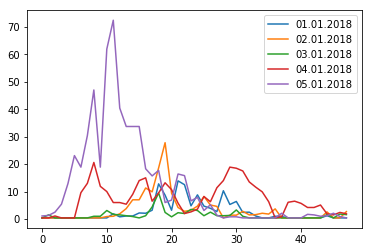

In [22]:
for i in range(5):
    plt.plot(np.arange(0,48), df_Ost.iloc[i*48:i*48 + 48, 1], label='0{}.01.2018'.format(str(i + 1)))
plt.legend()
plt.show()

In [23]:
df_Friedberg['Time'] = df_Friedberg.Datum_Zeit.dt.time
df_Friedberg['Time'] = df_Friedberg['Time'].apply(lambda x: x.hour*60 + x.minute)
df_Friedberg['Time_rel_cosinus'] = df_Friedberg['Time'].apply(lambda x: np.cos(2*np.pi/(24*60)*x))
df_Friedberg['Time_rel_sinus'] = df_Friedberg['Time'].apply(lambda x: np.sin(2*np.pi/(24*60)*x))
df_Friedberg.head()

,Datum_Zeit,Stickstoffmonoxid (NO)[µg/m³],Stickstoffdioxid (NO2)[µg/m³],Time,Time_rel_cosinus,Time_rel_sinus
0,2018-01-07 00:30:00,8.9,23.2,30,0.991445,0.130526
1,2018-01-07 01:00:00,15.2,22.2,60,0.965926,0.258819
2,2018-01-07 01:30:00,14.9,24.3,90,0.923880,0.382683
3,2018-01-07 02:00:00,10.8,18.5,120,0.866025,0.500000
4,2018-01-07 02:30:00,10.6,23.9,150,0.793353,0.608761


In [24]:
Friedberg_missing_cols = list(set(df_Ost.columns) - set(df_Friedberg.columns))
Friedberg_wind = [item for item in Friedberg_missing_cols if 'Wind' in item]
Friedberg_wind

['Windgeschwindigkeit[m/s]', 'Windrichtung[Grad]']

In [25]:
df_Friedberg = df_Friedberg.join(pd.DataFrame(df_Ost.loc[:,Friedberg_wind].values, columns = ['Wind_Ost_d', 'Wind_Ost_v']))
df_Friedberg = df_Friedberg.join(pd.DataFrame(df_Schwan.loc[:,Friedberg_wind].values, columns = ['Wind_Schwan_d', 'Wind_Schwan_v']))
df_Friedberg = df_Friedberg.join(pd.DataFrame(df_Hochst.loc[:,Friedberg_wind].values, columns = ['Wind_Hochst_d', 'Wind_Hochst_v']))

In [26]:
df_Friedberg.head()

,Datum_Zeit,Stickstoffmonoxid (NO)[µg/m³],Stickstoffdioxid (NO2)[µg/m³],Time,Time_rel_cosinus,Time_rel_sinus,Wind_Ost_d,Wind_Ost_v,Wind_Schwan_d,Wind_Schwan_v,Wind_Hochst_d,Wind_Hochst_v
0,2018-01-07 00:30:00,8.9,23.2,30,0.991445,0.130526,2.0,12.0,1.0,15.0,2.1,47.0
1,2018-01-07 01:00:00,15.2,22.2,60,0.965926,0.258819,1.8,21.0,0.7,19.0,1.8,53.0
2,2018-01-07 01:30:00,14.9,24.3,90,0.923880,0.382683,2.3,16.0,1.0,14.0,1.9,43.0
3,2018-01-07 02:00:00,10.8,18.5,120,0.866025,0.500000,2.4,11.0,1.0,11.0,1.9,43.0
4,2018-01-07 02:30:00,10.6,23.9,150,0.793353,0.608761,1.8,6.0,1.2,18.0,1.8,45.0


In [27]:
df_Friedberg.fillna(method ='bfill', inplace=True)
df_Friedberg.isna().sum()
df_Friedberg.fillna(method ='ffill', inplace=True)
df_Friedberg.isna().sum()

Datum_Zeit                       0
Stickstoffmonoxid (NO)[µg/m³]    0
Stickstoffdioxid (NO2)[µg/m³]    0
Time                             0
Time_rel_cosinus                 0
Time_rel_sinus                   0
Wind_Ost_d                       0
Wind_Ost_v                       0
Wind_Schwan_d                    0
Wind_Schwan_v                    0
Wind_Hochst_d                    0
Wind_Hochst_v                    0
dtype: int64

In [28]:
df_Friedberg.to_csv('Target_And_Wind_Dataframe.csv')

# Neuer Kram

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
data_col = list(df_Friedberg.columns)[3:]
label_col = list(df_Friedberg.columns)[1:3]

In [31]:
train_data, test_data, train_label, test_label = train_test_split(df_Friedberg[data_col], df_Friedberg[label_col])

In [32]:
RFR = RandomForestRegressor()
RFR.fit(train_data, train_label)
print('RMSE on training: {}'.format(mean_squared_error(RFR.predict(train_data), train_label)))

RMSE on training: 105.29834043368415


In [33]:
print('RMSE on training: {}'.format(mean_squared_error(RFR.predict(test_data), test_label)))

RMSE on training: 562.7498934688566


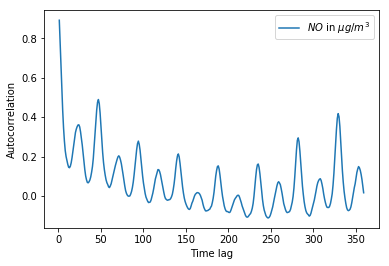

In [43]:
autocorr = []
for i in range(1,15*24):
    autocorr.append(df_Friedberg[label_col[0]].autocorr(lag = i))
    
plt.plot(np.arange(1,15*24),autocorr, label = '$NO$ in $ \mu g/ m^3$')
plt.xlabel('Time lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

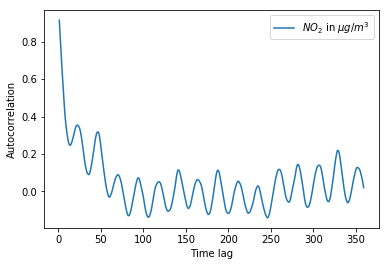

In [40]:
autocorr = []
for i in range(1,15*24):
    autocorr.append(df_Friedberg[label_col[1]].autocorr(lag = i))
    
plt.plot(np.arange(1,15*24),autocorr, label = '$NO_2$ in $ \mu g/ m^3$')
plt.xlabel('Time lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()